In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy
from sklearn.feature_selection import SelectKBest,f_classif

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset 
handwritten_digits = fetch_ucirepo(id=80) 
spambase = fetch_ucirepo(id=94) 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)


KeyboardInterrupt: 

## Loan Dataset

In [50]:

loan = pd.read_csv(r"./datasets/dataset1_Loan.csv")

In [51]:
print(loan.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [52]:
print(len(loan[loan["Loan_Status"]=="Y"]))
print(len(loan[loan["Loan_Status"]=="N"]))
loan.info()

422
192
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


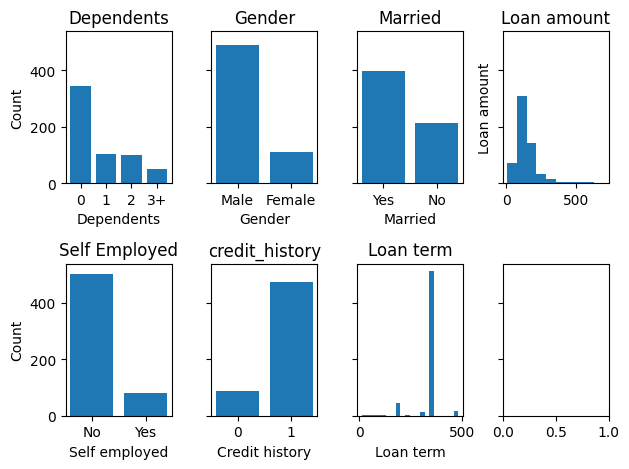

In [53]:

# loan["Dependents"].fillna("0",inplace=True)

dependents = loan["Dependents"].value_counts()
gender = loan["Gender"].value_counts()
married = loan["Married"].value_counts()
self_employed = loan["Self_Employed"].value_counts()
credit_history = loan["Credit_History"].value_counts()
loan_term = loan["Loan_Amount_Term"].value_counts()

fig,ax = plt.subplots(2,4,sharey=True)
ax[0,0].set_title("Dependents")
ax[0,0].bar(dependents.index, dependents.values)
ax[0,0].set_ylabel("Count")
ax[0,0].set_xlabel("Dependents")

ax[0,1].set_title("Gender")
ax[0,1].bar(gender.index,gender.values)
ax[0,1].set_xlabel("Gender")

ax[0,2].set_title("Married")
ax[0,2].bar(married.index,married.values)
ax[0,2].set_xlabel("Married")

ax[0,3].set_title("Loan amount")
ax[0,3].hist(loan["LoanAmount"])
ax[0,3].set_ylabel("Loan amount")

ax[1,0].set_title("Self Employed")
ax[1,0].set_ylabel("Count")
ax[1,0].set_xlabel("Self employed")
ax[1,0].bar(self_employed.index, self_employed.values)

ax[1,1].set_title("credit_history")
ax[1,1].set_xlabel("Credit history")
ax[1,1].bar(credit_history.index,credit_history.values)

ax[1,2].set_title("Loan term")
ax[1,2].set_xlabel("Loan term")
# ax[1,2].bar(loan_term.index,loan_term.values)
ax[1,2].hist(loan["Loan_Amount_Term"], bins=20)

plt.tight_layout()
plt.show()

<Axes: >

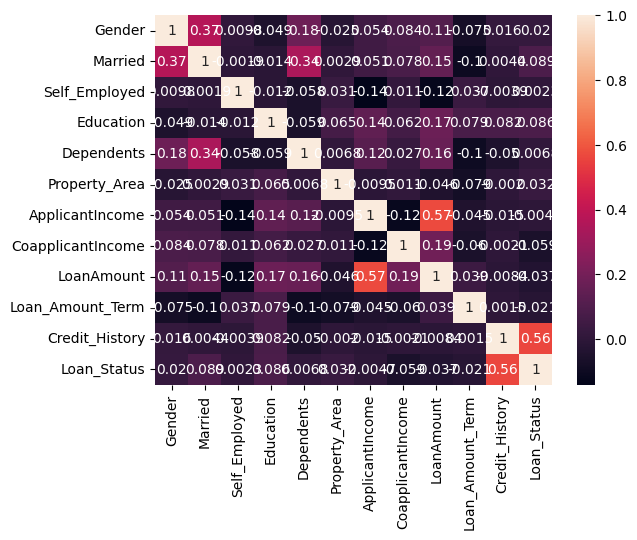

In [54]:

loan["Gender"] = loan["Gender"].map({"Male": 1, "Female": 0})
loan["Married"] = loan["Married"].map({"Yes": 1, "No": 0})
loan["Self_Employed"] = loan["Self_Employed"].map({"Yes": 0, "No": 1})
loan["Education"] = loan["Education"].map({"Graduate": 1, "Not Graduate": 0})
loan["Dependents"] = loan["Dependents"].map({"0": 0, "1": 1, "2": 2, "3+": 3})
loan["Property_Area"] = loan["Property_Area"].map({"Urban": 2, "Semiurban": 1, "Rural": 0})
loan["Loan_Status"] = loan["Loan_Status"].map({"Y": 1, "N": 0})


loan = loan[["Gender", "Married", "Self_Employed", "Education", "Dependents", "Property_Area","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History", "Loan_Status"]]

sns.heatmap(loan.corr(), annot=True)

In [32]:
loan["Dependents"] = loan["Dependents"].fillna(loan["Dependents"].mode())
loan["Gender"] = loan["Gender"].fillna(loan["Gender"].mode())
loan["Married"] = loan["Married"].fillna(loan["Married"].mode())
loan["Self_Employed"] = loan["Self_Employed"].fillna(loan["Self_Employed"].mode())
loan["Credit_History"] = loan["Credit_History"].fillna(loan["Credit_History"].mode())
loan["Loan_Amount_Term"] = loan["Loan_Amount_Term"].fillna(loan["Loan_Amount_Term"].mode())
loan["LoanAmount"] = loan["LoanAmount"].fillna(loan["LoanAmount"].median())

In [58]:
X = loan.drop('Loan_Status', axis=1)

X.fillna(X.median(), inplace=True)
y = loan['Loan_Status']


selector = SelectKBest(score_func=f_classif, k='all')
fit = selector.fit(X, y)
scores = [{"Column":X.columns[k],"Score":fit.scores_[k],"P value":fit.pvalues_[k]} for k in range(len(X.columns))]


output = pd.DataFrame(scores)
output.sort_values("P value")


,Column,Score,P value
10,Credit_History,252.652090,7.019682e-48
1,Married,5.164552,2.339836e-02
3,Education,4.547685,3.336068e-02
7,CoapplicantIncome,2.151457,1.429483e-01
8,LoanAmount,0.675896,4.113237e-01
5,Property_Area,0.631733,4.270284e-01
9,Loan_Amount_Term,0.311334,5.770668e-01
0,Gender,0.198059,6.564498e-01
4,Dependents,0.062665,8.024165e-01
6,ApplicantIncome,0.013574,9.072878e-01


## Iris

In [3]:
iris = pd.read_csv(r"./datasets/dataset1_Iris.csv")
print(iris.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [16]:
virginica = iris[iris["Species"]=="Iris-virginica"]
setosa = iris[iris["Species"]=="Iris-setosa"]
versicolor = iris[iris["Species"]=="Iris-versicolor"]



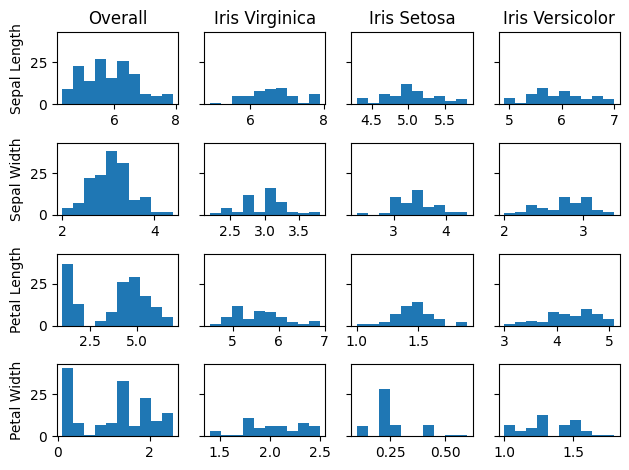

In [20]:
fig,ax = plt.subplots(nrows=4,ncols=4,sharey=True)
attr = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

title = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]


for i in range(4):
    ax[i,0].hist(iris[attr[i]])
    ax[i,0].set_ylabel(title[i])
    
    ax[i,1].hist(virginica[attr[i]])

    ax[i,2].hist(setosa[attr[i]])

    ax[i,3].hist(versicolor[attr[i]])
    if i!=0:
        continue
    ax[i,0].set_title("Overall")
    ax[i,2].set_title("Iris Setosa")
    ax[i,1].set_title("Iris Virginica")
    ax[i,3].set_title("Iris Versicolor")

plt.tight_layout()
plt.show()


In [21]:
iris["Species"].tail()

iris["Species"] = iris["Species"].map({"Iris-setosa":0, "Iris-versicolor": 1, "Iris-virginica": 2})

<Axes: >

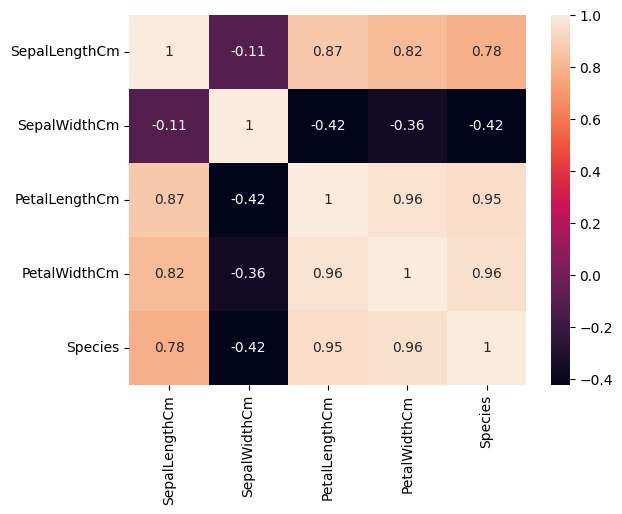

In [24]:
sns.heatmap(iris[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm","Species"]].corr(), annot=True)

In [59]:
X = iris.drop(["Species","Id"], axis=1)
y = iris["Species"]



selector = SelectKBest(score_func=f_classif,k="all")
fit = selector.fit(X,y)
scores = [{"Column":X.columns[k],"Score":fit.scores_[k],"P value":fit.pvalues_[k]} for k in range(len(X.columns))]


output = pd.DataFrame(scores)
output.sort_values("P value")



,Column,Score,P value
2,PetalLengthCm,1179.034328,3.051976e-91
3,PetalWidthCm,959.324406,4.376957e-85
0,SepalLengthCm,119.264502,1.669669e-31
1,SepalWidthCm,47.364461,1.327917e-16


In [3]:
handwritten_digits = pd.read_csv(r'datasets\dataset1_Numbers.csv')

handwritten_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3823 entries, 0 to 3822
Data columns (total 65 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Label1   3823 non-null   int64
 1   Label2   3823 non-null   int64
 2   Label3   3823 non-null   int64
 3   Label4   3823 non-null   int64
 4   Label5   3823 non-null   int64
 5   Label6   3823 non-null   int64
 6   Label7   3823 non-null   int64
 7   Label8   3823 non-null   int64
 8   Label9   3823 non-null   int64
 9   Label10  3823 non-null   int64
 10  Label11  3823 non-null   int64
 11  Label12  3823 non-null   int64
 12  Label13  3823 non-null   int64
 13  Label14  3823 non-null   int64
 14  Label15  3823 non-null   int64
 15  Label16  3823 non-null   int64
 16  Label17  3823 non-null   int64
 17  Label18  3823 non-null   int64
 18  Label19  3823 non-null   int64
 19  Label20  3823 non-null   int64
 20  Label21  3823 non-null   int64
 21  Label22  3823 non-null   int64
 22  Label23  3823 non-null  

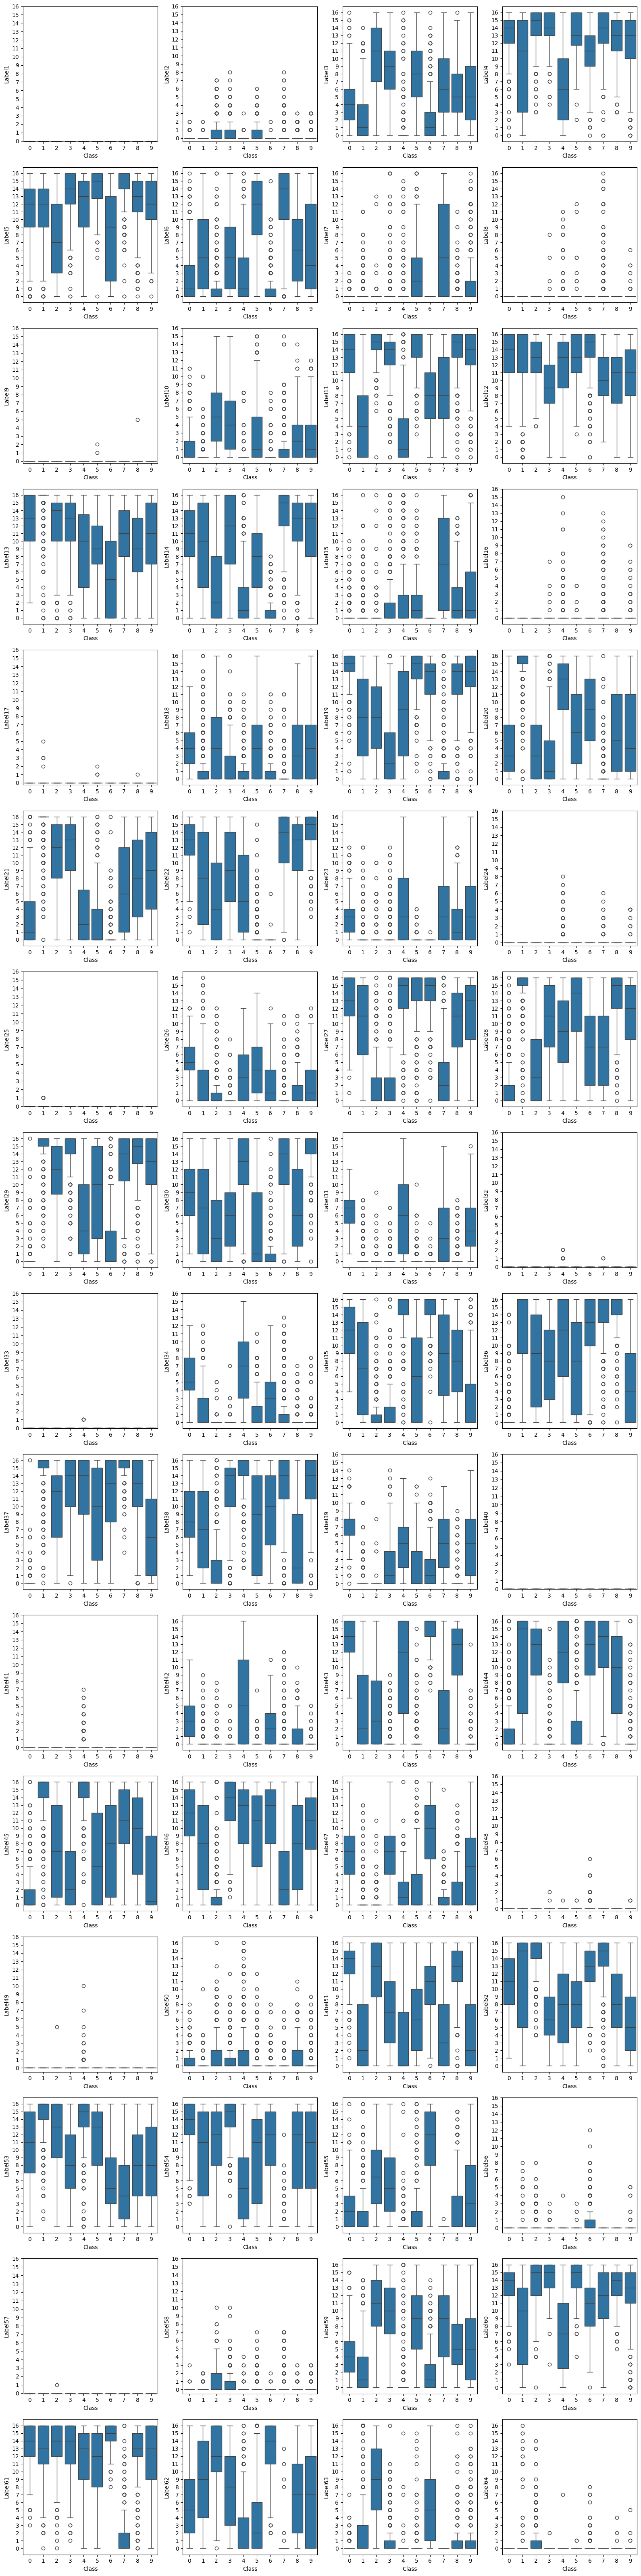

In [13]:
X = handwritten_digits.drop("Class", axis = 1)
y = handwritten_digits["Class"]

fig,axs = plt.subplots(nrows = 16, ncols = 4, figsize=(16,64))

axs = axs.flatten()

for i in range(64):
    sns.boxplot(y = X[f"Label{i+1}"],x=y,ax=axs[i])
    axs[i].set_xticks([0,1,2,3,4,5,6,7,8,9])
    axs[i].set_yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

plt.tight_layout()
plt.show()




In [ ]:
X = handwritten_digits.drop("Class", axis=1)
y = handwritten_digits["Class"]



selector = SelectKBest(score_func=f_classif,k="all")
fit = selector.fit(X,y)
scores = [{"Column":X.columns[k],"Score":fit.scores_[k],"P value":fit.pvalues_[k]} for k in range(len(X.columns))]


output = pd.DataFrame(scores)
output.sort_values("P value")